In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists, basename

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')


[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]


(array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 [Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.6500000000000001, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.7500000000000001, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9000000000000001, '0.90'),
  Text(0, 0.9500000000000002, '0.95')])

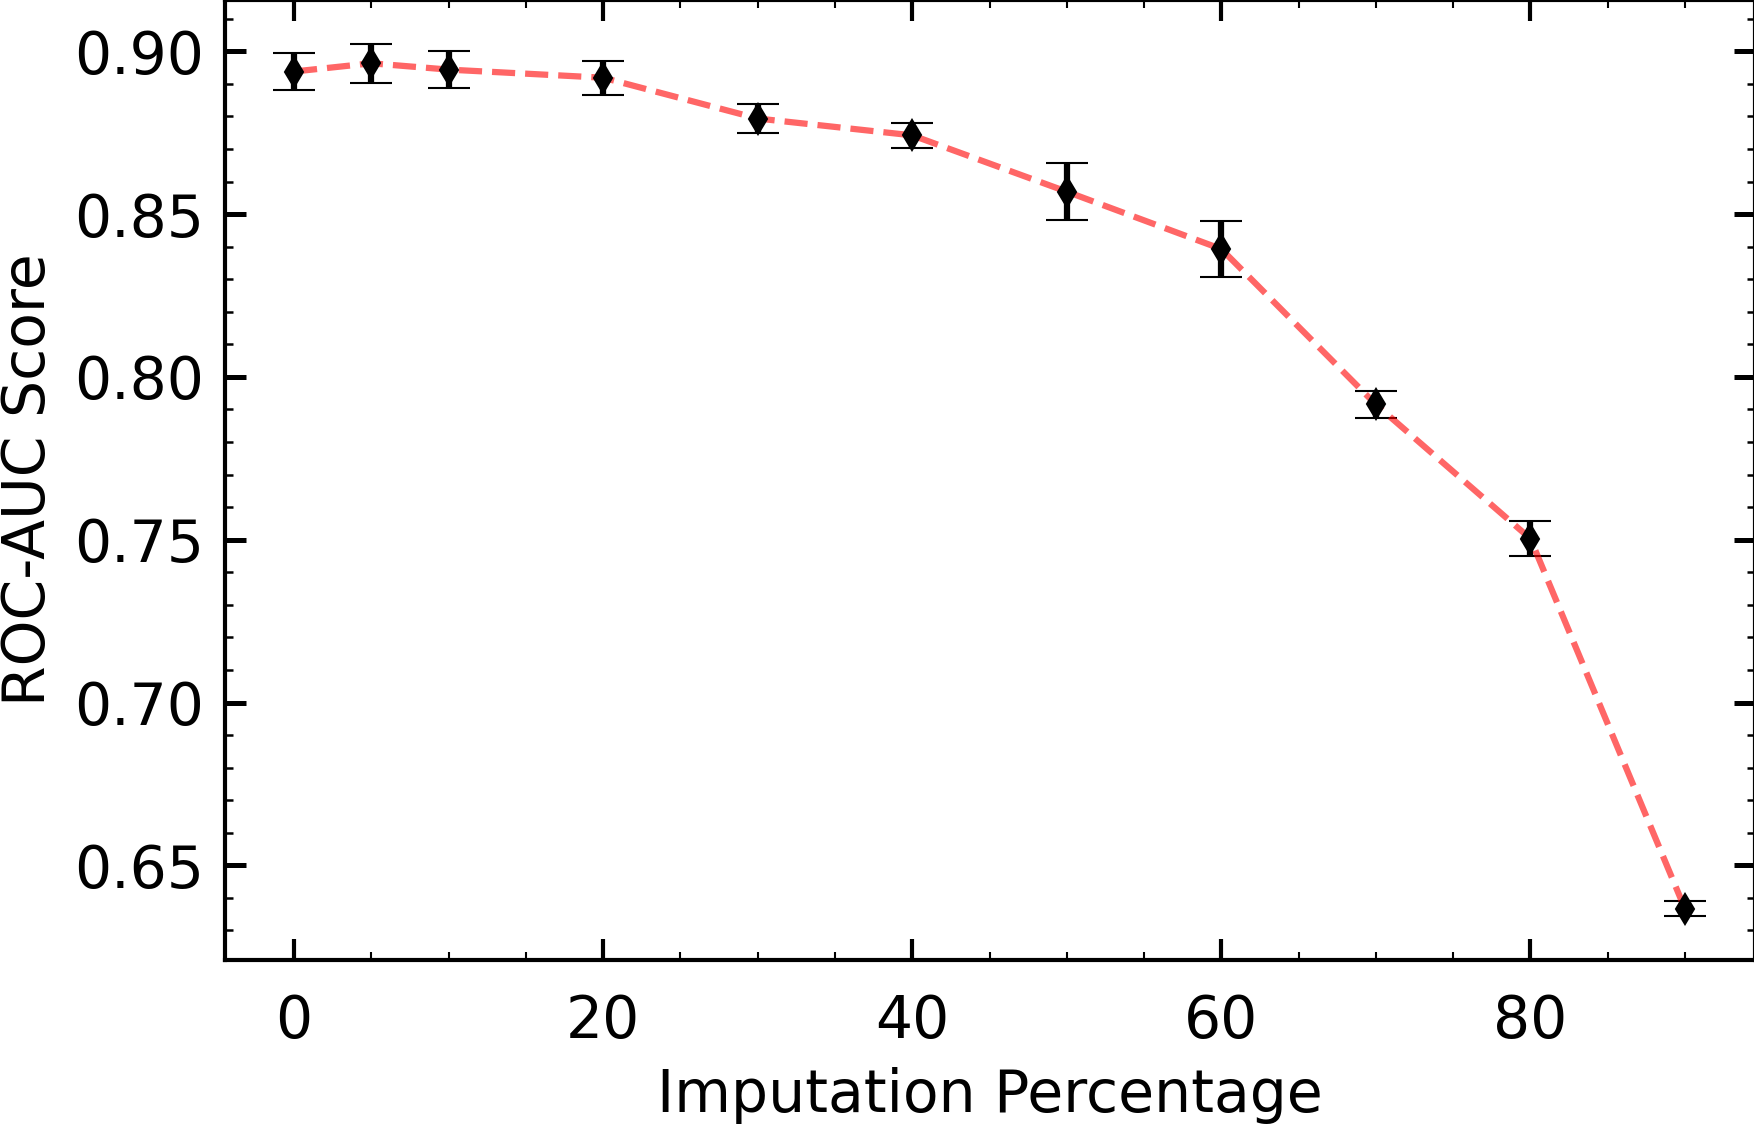

In [42]:
plist=[0,5,10,20,30,40,50,60,70,80,90]

allrocauc=np.zeros((4,len(plist)))

for k in range(1,5):
    rocauc=np.array([])
    for i in range(0,len(plist)):
        res=pd.read_csv('results\\'+str(plist[i])+'_'+str(k)+'.csv')
        rocauc=np.append(rocauc,res['ROC AUC'])
    allrocauc[k-1]=rocauc
    
all = pd.DataFrame(allrocauc)
avgs=all.mean(axis=0)
fig, ax = plt.subplots(figsize=(6,4),dpi=300)
print(plist)
ax.errorbar(plist,avgs,linestyle=' ',yerr=all.sem(),marker='d',markersize=5,capsize=5,color='black')
ax.plot(plist,avgs,linestyle='--',alpha=0.6,color='red')
ax.set_xlabel('Imputation Percentage',fontsize=14)
ax.set_ylabel('ROC-AUC Score',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
